# Day 3 - Data Science Essentials Program

**Agenda**
- Takeup FF3 Model
- Morning: Logistic Regression
- Afternoon: Decision Trees

**Coffee break until 10am BST/5am EST**

## Import Packages and Data
- can copy these from the `LogisticRegression.ipynb` file

In [4]:
import numpy as np #array/matrix manipulation
import pandas as pd
import matplotlib.pyplot as plt #visualization
import seaborn as sns #more complex charts

#ML - Forecasting Models
from sklearn.linear_model import LogisticRegression #model
from scipy.special import expit

#metrics to determine how good the model is
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

## Intuition behind the sigmoid function

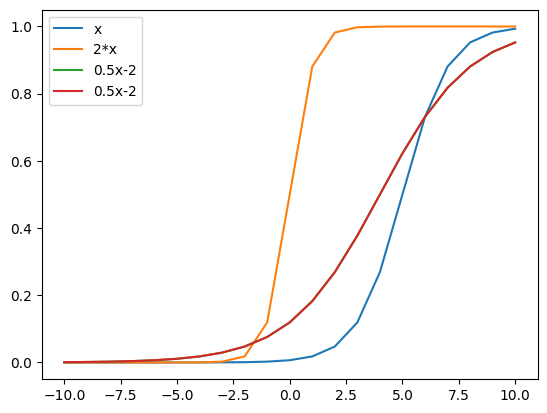

In [25]:
x = np.arange(-10, 11, 1)
y = 1 / (1+ np.exp(-(x-5)))

y2 = 1 / (1+ np.exp(-2* x))
y2expit = expit(0.5*x-2)
y3 = 1 / (1+ np.exp(-(0.5* x-2)))

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y2expit)
plt.plot(x, y3)
plt.legend(['x', '2*x','0.5x-2','0.5x-2'])

## Student Hours Demo

In [51]:
df = pd.read_csv('ExData/score.csv')
df['Outcome'] = df['Scores'].apply(lambda x: 1 if x>50 else 0)
# df['Outcome'] = np.where(df['Scores'] > 50, 1, 0) #does the exact same thing
#df

In [52]:
# df.describe()
df['Outcome'].value_counts()

Outcome
0    14
1    13
Name: count, dtype: int64

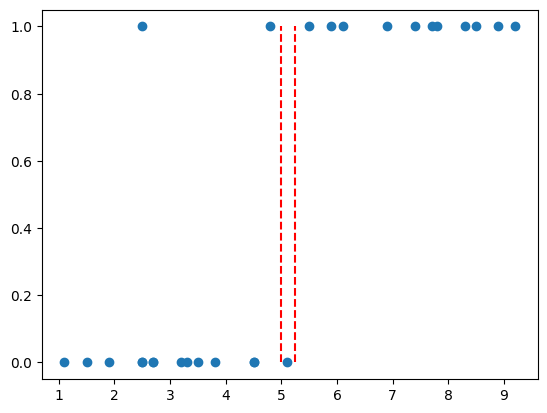

In [53]:
plt.scatter(df['Hours'], df['Outcome'])
plt.vlines(5, ymin=0, ymax=1, color='r', linestyles='--')
plt.vlines(5.25, ymin=0, ymax=1, color='r', linestyles='--')

## Logistic Regression - Scores Data Set
- create your X and y variables
- X has to be a 2-d array/matrix (or a table in pandas)
    - if you want to use only one column as the X, enter it as a table or 2-d matrix
    - df[[col]]

In [54]:
df['Hours'].head() #series --> flat array of one column

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [55]:
df[['Hours']].head() #dataframe, 2-d matrix

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [56]:
df[['Hours']].shape, df['Hours'].shape

((27, 1), (27,))

In [57]:
X = df[['Hours']] #this needs to be a 2-d matrix
y = df['Outcome'] #this can be a series, dosn't need to be 2-d matrix

In [58]:
clf = LogisticRegression()  #clf = classifier
clf.fit(X, y)

LogisticRegression()

In [59]:
clf.intercept_, clf.coef_

(array([-5.50079133]), array([[1.13737908]]))

In [68]:
#probabilit curve
prob = expit(clf.intercept_ + clf.coef_ * X)
df['Probability'] = prob
df['Predict'] = df['Probability'].apply(lambda x: 1 if x>0.5 else 0)
df['Predict with model'] = clf.predict(X) # the 0s and 1s at a cutoff of 50% probability

In [70]:
#Look at the probabilities without using expit
clf.predict_proba(X) #2d matrix with 2 columns
        #column 0 --> prob of a fail
        #column 1 --> prob of a pass
passProb = clf.predict_proba(X)[:,1]
failProb = clf.predict_proba(X)[:,0]
passProb

array([0.06553783, 0.57440389, 0.13456578, 0.98473682, 0.17946674,
       0.0219945 , 0.99305729, 0.68022231, 0.9809126 , 0.0809233 ,
       0.96292482, 0.77025387, 0.40550347, 0.14837034, 0.01406814,
       0.99026151, 0.06553783, 0.03423173, 0.80802395, 0.94862266,
       0.0809233 , 0.48965854, 0.23527688, 0.91270538, 0.96677829,
       0.06553783, 0.40550347])

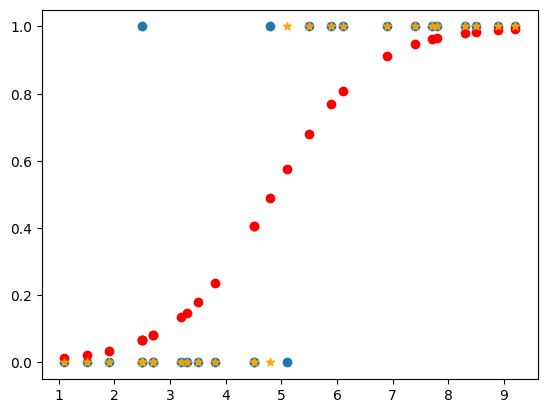

In [67]:
plt.scatter(df['Hours'], df['Outcome'])
plt.scatter(df['Hours'],df['Probability'], color='red')
plt.scatter(df['Hours'], df['Predict'],marker='*',color='orange', alpha=0.9)

## Checking the Performance of the Model
- there are various metrics you can calc to see how "accurate" the model is
- confusion matrix
- accuracy score
- precision
- recall
- f1 score
- AUC

In [77]:
clf.score(X, y) #88% accuracy
        # correct predcitions as a % of total observations
# (27-3) / 27
        #there were 3 incorrect students/predictions
        #27 students in the data set

0.8888888888888888

In [78]:
confusion_matrix(df['Outcome'], df['Predict'])

array([[13,  1],
       [ 2, 11]], dtype=int64)

In [79]:
#Precision ratio of correct positives as % of all forecasted positives
11 / (11 + 1)

0.9166666666666666

In [80]:
#Recall - ratio of correct positives as % of all ACTUAL positives
11 / (11+2)

0.8461538461538461

In [83]:
print(classification_report(df['Outcome'], df['Predict']))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.92      0.85      0.88        13

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



In [85]:
df['Predict 80%'] = df['Probability'].apply(lambda x: 1 if x>0.8 else 0)
print(classification_report(df['Outcome'], df['Predict 80%']))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.69      0.82        13

    accuracy                           0.85        27
   macro avg       0.89      0.85      0.85        27
weighted avg       0.88      0.85      0.85        27



In [86]:
confusion_matrix(df['Outcome'], df['Predict 80%'])

array([[14,  0],
       [ 4,  9]], dtype=int64)

**Q&A: What score to use?**
- accuracy - if data is "balanced" (similar proportions of pass/fail, yes/no, fraud/no fraud)
- precision - if you care about minimizing false positives (e.g. credit card fraud, or disease diagnosis, etc.)
- recall - if care you care bout minimizing false negtives (situation where having false negatives more costly)
- F1 - no preference, both FP and FN are important, but your data is not balanced (harmonic mean of Precision and Recall)

## Car Data Set - Logistic Regression

In [91]:
df = pd.read_csv("ExData/car_data.csv", index_col=['User ID'])
#df.info()
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [92]:
df['Purchased'].value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

In [94]:
df[['Gender']].value_counts()

Gender
Female    516
Male      484
Name: count, dtype: int64

In [93]:
df[['Purchased','Gender']].value_counts()

Purchased  Gender
0          Male      301
           Female    297
1          Female    219
           Male      183
Name: count, dtype: int64

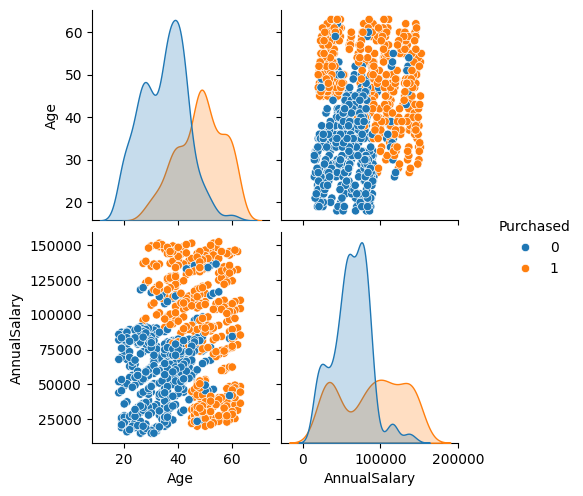

In [96]:
# sns.pairplot(df)
sns.pairplot(df, hue='Purchased')

<Axes: >

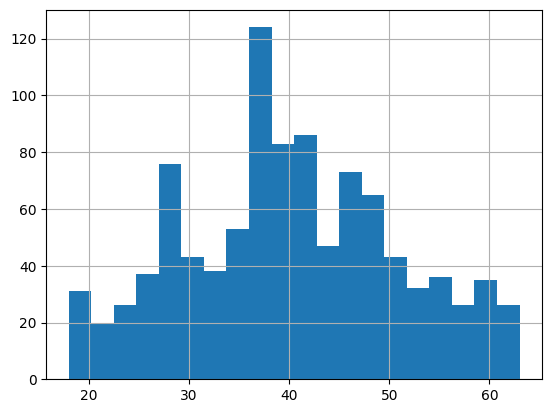

In [97]:
df['Age'].hist(bins=20)

## Logistic Regression - No Preprocessing
- will get bad results due to scaling of salary (it's in the 000's vs age is in double digits)

In [121]:
X = df[['AnnualSalary']]
# X = df[['Age']]
y = df['Purchased']
clf = LogisticRegression(random_state=0) #could have situations where it gives different answers if no optimal solution
clf.fit(X,y)

LogisticRegression(random_state=0)

In [122]:
clf.score(X,y) #accuracy

0.598

In [113]:
confusion_matrix(y, clf.predict(X))

array([[528,  70],
       [119, 283]], dtype=int64)

In [114]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       598
           1       0.80      0.70      0.75       402

    accuracy                           0.81      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.81      0.81      0.81      1000



## Lunch break until 1pm BST / 8am EST
- when we come back will run again with standardized salaries
- mini assignment to try different X's as the inputs to model

**Q&A: more examples of when you care about precision vs recall**
Source: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/

- Care about Precision - Tagging videos as safe for kids
    - you want to have as few false positives as possible even at the expense of a low recall score
    - ok if you tag some videos as "not safe" as long as all the ones being predicted as safe are actually safe
    - other examples: spam filter (don't want to incorrectly predict good emails to be spam, let user decide)
- Care about Recall - finding shoplifters in a store
    - you want to catch as many shoplifters as possible (high recall) even at the expense of having some false positives (i.e. ppl who didn't shoplift but you still check)
    - other examples: fraud transactions (want to correctly find all fraudulent tx)

**Q&A: how to remmber which metric is which**
- **P**recision is for **P**redicted values (TP as % of all *predicted* positives)
- **R**ecall is for **R**eal values (TP % of all *real/actual* positives)

## Logistic Regression - Car Data - Processed Data
- standardize the salary so the scaling is not as large
- "naive" approach --> just take the $ divide by 1,000
- z-scores --> (xvalue - avg) / std --> StandardScaler
- % of the max --> abs(xvalue / max(xs))

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
df['AnnualSalaryStd'] = StandardScaler().fit_transform(df[['AnnualSalary']]) #z-scores
df['AnnualSalaryScaled'] = MaxAbsScaler().fit_transform(df[['AnnualSalary']]) #xi / max(all x)

In [125]:
X = df[['AnnualSalaryStd']]
y = df['Purchased']
clf = LogisticRegression(random_state=0)
clf.fit(X,y)

LogisticRegression(random_state=0)

In [126]:
clf.score(X,y)

0.771

In [127]:
confusion_matrix(y, clf.predict(X))

array([[566,  32],
       [197, 205]], dtype=int64)

In [128]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       598
           1       0.86      0.51      0.64       402

    accuracy                           0.77      1000
   macro avg       0.80      0.73      0.74      1000
weighted avg       0.79      0.77      0.76      1000



In [132]:
df['Gender'].str.get_dummies()

,Female,Male
User ID,,
385,0,1
681,0,1
353,0,1
895,0,1
661,0,1
...,...,...
863,0,1
800,1,0
407,1,0


In [131]:
pd.get_dummies(df['Gender'], dtype=int) #dtype=int to show 0/1 vs False/True

,Female,Male
User ID,,
385,0,1
681,0,1
353,0,1
895,0,1
661,0,1
...,...,...
863,0,1
800,1,0
407,1,0


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['AnnualSalaryStd'], df['Purchased'], test_size=0.25, random_state=42)

In [137]:
# X_train, y_train
# X_test

## Working Session + Coffee Break Until 2:30pm BST / 9:30am EST
- LogistcRegressionAssignment.ipynb --> in the Assignments folder, copy it over to your Python Project folder
- Python 2 Assignment #3 (pdf format)


## Takeup Logistic Assignment
- answer key: https://github.com/TheMarqueeGroup/JPM_DS_Oct2023/blob/main/LogisticRegressionAssignmentAnswer.ipynb

In [155]:
df.values

array([['Male', 35, 20000, 0, -1.5284980785209714, 0.13114754098360656],
       ['Male', 40, 43500, 0, -0.8467674545720859, 0.28524590163934427],
       ['Male', 49, 74000, 0, 0.038031865872212293, 0.4852459016393443],
       ...,
       ['Female', 28, 138500, 1, 1.9091648550085152, 0.9081967213114754],
       ['Female', 48, 134000, 1, 1.7786206929757498, 0.8786885245901639],
       ['Female', 44, 73500, 0, 0.023526958979682815, 0.4819672131147541]],
      dtype=object)

### Creating the AUC/ROC
- find the probabilities of the sigmoid function (can use expit or clf.predict_proba)
- pull out/calc the TPR and FPR
- calculate the auc and visualize

```
y_prob = clf.predict_proba(X)[:,1] #prob of purchase
#or
y_prob = expit(clf.intercept_ + clf.coef_ * X)
```

calc the fpr and tpr:
```
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc_score = auc(fpr, tpr)
```


In [156]:
X = df[['AnnualSalaryStd']]
y = df['Purchased']
clf = LogisticRegression(random_state=0)
clf.fit(X,y)

LogisticRegression(random_state=0)

In [164]:
clf.predict_proba(X)

array([[0.84248773, 0.15751227],
       [0.75496111, 0.24503889],
       [0.60092831, 0.39907169],
       ...,
       [0.2488698 , 0.7511302 ],
       [0.26913368, 0.73086632],
       [0.60373947, 0.39626053]])

In [157]:
b0 = clf.intercept_ #beta 0, the intercept
b1 = clf.coef_ #beta1, the coefficient
b0, b1

(array([-0.44010715]), array([[0.8091267]]))

In [160]:
y_prob = expit(b0 + b1 * X) #probilities of a purchase

#y_prob = clf.predict_proba(X)[:,1]
y_prob

,AnnualSalaryStd
User ID,
385,0.157512
681,0.245039
353,0.399072
895,0.593149
661,0.427521
...,...
863,0.318337
800,0.168723
407,0.751130


In [161]:
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc_score = auc(fpr, tpr)
auc_score

0.6883142814356312

In [163]:
resultsDF = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresholds})
#resultsDF

resultsDF.iloc[73:78]
        #TPR = recall of 1's = TP / actual positives
        #FPR = inverse of recall of 0's = 1 - (TN/actual negatives) = FP / actual negatives

,FPR,TPR,Threshold
73,0.050167,0.477612,0.526740
74,0.050167,0.490050,0.509160
75,0.050167,0.500000,0.506227
76,0.053512,0.509950,0.500359
77,0.053512,0.512438,0.497425


In [149]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       598
           1       0.86      0.51      0.64       402

    accuracy                           0.77      1000
   macro avg       0.80      0.73      0.74      1000
weighted avg       0.79      0.77      0.76      1000



Text(0, 0.5, 'True Positive Rate')

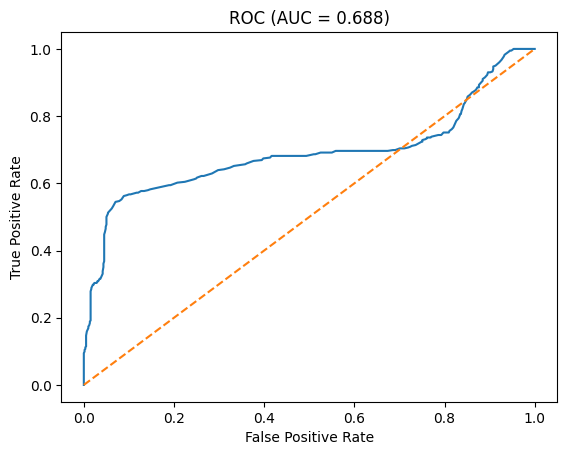

In [153]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), linestyle="--") #50% line or "random" / no skill
plt.title(r"ROC (AUC = {:.3f})".format(auc_score))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Decision Trees
Coffee break until 3:10pm BST / 10:10am EST
- when you're back from coffee open the `DecisionTree.ipynb` file
- slide 75 in presentation
- import the "tree" model from sklearn and the scores data set again

Pros:
- very fast, easy to use, and no pre-processing is neded
    - e.g. no need to adjust salaries for the car data

Cons:
- they have tendancy to overfit the data --> you need to "prune" the tree --> make it less complex
- very important to split your data bw training and testing, to see if test score is still high

Decision intuition:
- it will find the optimal way to "split" your x-variables
- same x-variable could be split multiple times 

In [167]:
from sklearn import tree
df = pd.read_csv('ExData/score.csv')
df['Outcome'] = df['Scores'].apply(lambda x: 1 if x> 50 else 0)
df.head()

,Hours,Scores,Outcome
0,2.5,21,0
1,5.1,47,0
2,3.2,27,0
3,8.5,75,1
4,3.5,30,0


In [168]:
X = df[['Hours']]
y = df['Outcome']
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [169]:
clf.score(X,y)

0.9629629629629629

In [170]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



In [175]:
df['Predict'] = clf.predict(X)

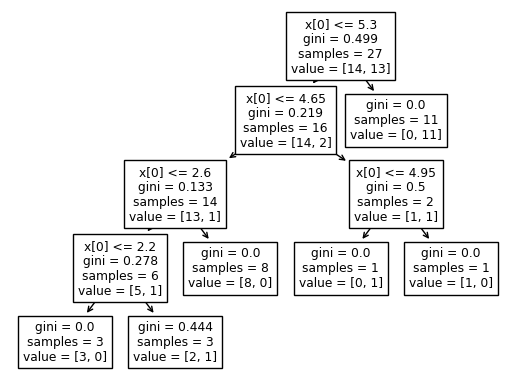

In [172]:
tree.plot_tree(clf)
plt.show()

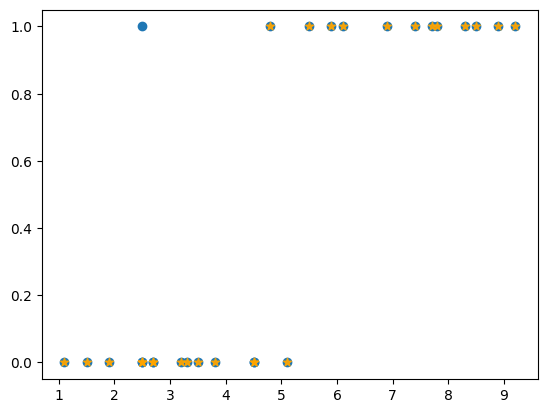

In [176]:
plt.scatter(df['Hours'], df['Outcome'])
plt.scatter(df['Hours'], df['Predict'],marker='*',color='orange', alpha=0.9)

## Overfitting - Restratining the Levels (Depth of tree)

In [178]:
clf.get_depth()

4

In [179]:
clf.tree_.node_count # the number of "boxes"

11

In [180]:
clf.get_n_leaves() # terminal leaves, where no more splits happen, "end" of a branch

6

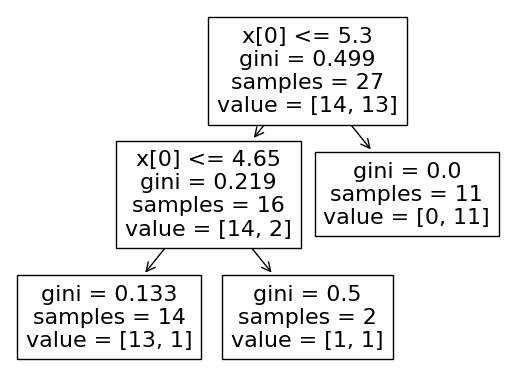

In [187]:
# clf_restrained = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf_restrained = tree.DecisionTreeClassifier(random_state=0, max_leaf_nodes=3)
clf_restrained.fit(X,y)
tree.plot_tree(clf_restrained)
plt.show()

## Overfitting - Reducing Complexity with CCP Alpha
- relatively new formula that they added to sklearn in the last 2-3
- the last ccp_alpha value is for a tree with no splits, usually ignore

In [188]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X, y) #find all the optimal ccp alpha values
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas, impurities

(array([0.        , 0.00970018, 0.03042328, 0.3696845 ]),
 array([0.04938272, 0.06878307, 0.12962963, 0.49931413]))

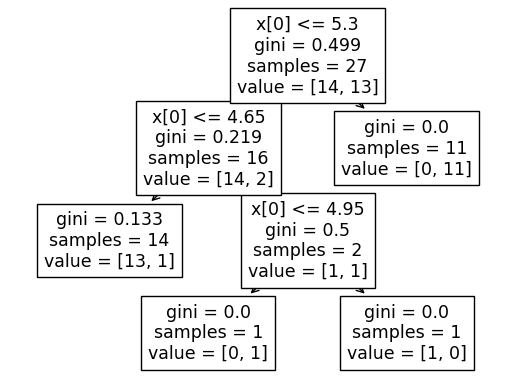

In [197]:
# clf1 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.00970018)
clf1 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.00970018)
clf1.fit(X,y)
tree.plot_tree(clf1)
plt.show()

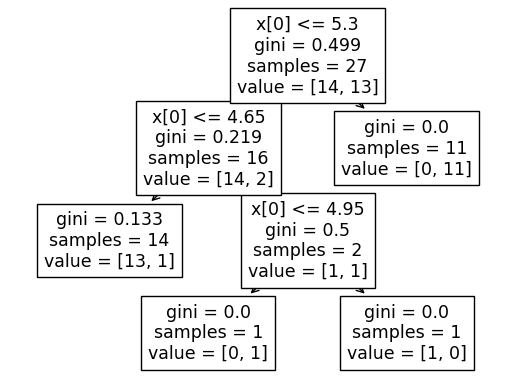

In [196]:
clf2 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.03042328)
clf2.fit(X,y)
tree.plot_tree(clf2)
plt.show()

## Car Data Set - Decision Tree

In [198]:
df = pd.read_csv('ExData/car_data.csv', index_col=['User ID'])

In [200]:
X = df[['AnnualSalary']]
y = df['Purchased']
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [201]:
clf.score(X,y)

0.82

In [204]:
clf.tree_.node_count #313
clf.get_depth() #18

18

In [207]:
# tree.plot_tree(clf, fontsize=6)
# plt.show()

In [202]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       598
           1       0.84      0.68      0.75       402

    accuracy                           0.82      1000
   macro avg       0.82      0.80      0.81      1000
weighted avg       0.82      0.82      0.82      1000



## Working Session until 4:40pm BST / 11:40am EST
- assignment notebook is in the assignments folder --> copy it over to the Python Project
    - `DecisionTreeAssignment.ipynb`

## Takeup Decision Tree Assignment
- answer key: https://github.com/TheMarqueeGroup/JPM_DS_Oct2023/blob/main/DecisionTreeAssignmentAnswer.ipynb

**Takeup Q3 below**

In [222]:
X = df[['Age','AnnualSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [221]:
y_train.value_counts()
# 460/750
# 449/750

Purchased
0    449
1    301
Name: count, dtype: int64

In [217]:
y_test.value_counts()
# 138/250

Purchased
0    138
1    112
Name: count, dtype: int64

In [223]:
#running the pruning path
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [224]:
len(ccp_alphas)

39

In [228]:
train_scores = []
test_scores = []
models = []
nodes = [] 
leaves = []
depths = []

for alpha in ccp_alphas:
    #print(alpha)
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    models.append(clf)
    score_train = clf.score(X_train,y_train)
    score_test = clf.score(X_test,y_test)
    train_scores.append(score_train)
    test_scores.append(score_test)

    depths.append(clf.get_depth())
    nodes.append(clf.tree_.node_count)

In [232]:
max(test_scores), test_scores.index((max(test_scores)))

(0.912, 23)

In [233]:
ccp_alphas[23]

0.0012839506172839501

In [235]:
results = pd.DataFrame( {'Alpha':ccp_alphas, 'Train Score':train_scores,
                        'Test Score':test_scores, 'Nodes':nodes, 'Depth':depths}   )
results

,Alpha,Train Score,Test Score,Nodes,Depth
0,0.000000,0.993333,0.864,217,18
1,0.000222,0.993333,0.864,215,18
2,0.000400,0.993333,0.864,211,18
3,0.000444,0.993333,0.864,207,18
4,0.000444,0.993333,0.864,207,18
5,0.000711,0.986667,0.864,185,14
6,0.000762,0.985333,0.864,179,14
7,0.000800,0.985333,0.864,177,14
8,0.000808,0.982667,0.864,165,14
9,0.000808,0.982667,0.864,165,14
